In [51]:
# 05_clustering (n)
# 1. Zaimplementuj Kmeans clustering dla datasetu wine.
    # - zmniejsz wymiar datasetu,  korzystając  StandardScaler oraz PCA(n_components=2, whiten=True) -> tylko do wizualizacji
    # - narysuj wykres typu "scatter" -> sprawdź czy widać "klastry"
    # - korzystając z metody "Elbow" wyznacz najlepszą liczbę n_clusters (wykorzystaj for loop, np range(1,11)) ->wykres
    # - korzystając z metryki silhouette_score, ponownie znajdź najlepszą liczbę n_clusters i porównaj z met. powyżej -> wykres,
    # - utwórz wykres typu "scatter", nadając każdemu punktowi kolor zgodny z danym klastrem
    # - wyznacz wartość accuracy, porównując numer klastra z kolumną "target" ('y')
    # - w algorytmie KMeans zmień init='random' na init='k-means++' i porównaj wyniki accuracy.

# 2. Wyznacz liczbę klastrów korzystając z MeanShift i porównaj z pkt.1

# Rozwiązanie prześlij jako printscreen (jpg, pdf).
# Nazwa pliku (bez polskich znaków):

# Nazwisko_Imie_05_niestacj.jpg

In [52]:
# silhouette_score(X, km.labels_)

In [53]:
# km.inertia_
# km = KMeans()

In [54]:
import numpy as np
seed = np.random.seed(61)

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

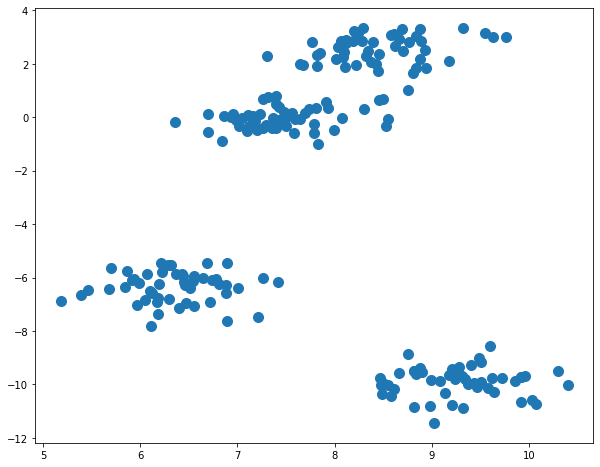

In [56]:
X, y = make_blobs(
    n_samples=200,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=seed
)

plt.figure(figsize=(10, 8))
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=100
)

plt.show()

In [57]:
from sklearn.cluster import KMeans

In [58]:
km_cls = KMeans(
    n_clusters=4,
    init='random',
    n_init=10,
    max_iter=300,
    random_state=seed
)

y_km = km_cls.fit_predict(X)
km_cls.cluster_centers_

array([[ 6.34871868, -6.36106946],
       [ 8.45242742,  2.53678751],
       [ 7.46243575, -0.03135427],
       [ 9.26883948, -9.89932491]])

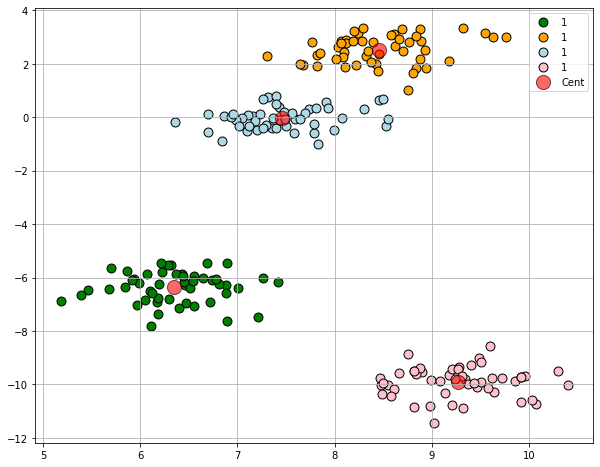

In [64]:
plt.figure(figsize=(10, 8))

plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    c='green', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    c='orange', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    c='lightblue', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X[y_km == 3, 0],
    X[y_km == 3, 1],
    c='pink', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    km_cls.cluster_centers_[:, 0],
    km_cls.cluster_centers_[:, 1],
    c='r', marker="o", s=200, alpha=0.6,
    edgecolor="black", label='Cent'
)

plt.legend()
plt.grid()
plt.show()

In [81]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [82]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [83]:
log_reg = LogisticRegression(max_iter=50, solver="liblinear")
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9666666666666667

In [87]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(max_iter=50, solver="liblinear"))
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9888888888888889

In [85]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = dict(kmeans__n_clusters=range(5,50))

grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=1)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'kmeans__n_clusters': 40}
0.9888888888888889
